In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ax
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\covid_19_in_India\\covid_19_india.csv")

In [3]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,11-08-2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,11-08-2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,11-08-2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


## Delete unwanted columns

In [4]:
covid_df = df.drop(columns=["Sno","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=False)

In [5]:
covid_df.head(5)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30-01-2020,6:00 PM,Kerala,0,0,1
1,31-01-2020,6:00 PM,Kerala,0,0,1
2,01-02-2020,6:00 PM,Kerala,0,0,2
3,02-02-2020,6:00 PM,Kerala,0,0,3
4,03-02-2020,6:00 PM,Kerala,0,0,3


## add new columns and find the active_cases

In [6]:
covid_df["Active_cases"] = covid_df["Confirmed"] - covid_df["Cured"] + covid_df["Deaths"]

In [7]:
covid_df.head(5)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,30-01-2020,6:00 PM,Kerala,0,0,1,1
1,31-01-2020,6:00 PM,Kerala,0,0,1,1
2,01-02-2020,6:00 PM,Kerala,0,0,2,2
3,02-02-2020,6:00 PM,Kerala,0,0,3,3
4,03-02-2020,6:00 PM,Kerala,0,0,3,3


## create pivot table and find the recovery rate and mortality rate

In [18]:
statewise = pd.pivot_table(covid_df,values=["Cured","Deaths","Confirmed"],index = "State/UnionTerritory",aggfunc = max)
statewise["Recovery_rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["mortality rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise = statewise.sort_values("State/UnionTerritory",ascending=False)
statewise.style.background_gradient (cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery_rate,mortality rate
State/UnionTerritory,,,,,
West Bengal,1534999,1506532,18252,98.145471,1.189056
Uttarakhand,342462,334650,7368,97.718871,2.151480
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
Unassigned,77,0,0,0.000000,0.000000
Tripura,80660,77811,773,96.467890,0.958344
Telengana,443360,362160,2312,81.685312,0.521472
Telangana,650353,638410,3831,98.163613,0.589065
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Sikkim,28018,25095,356,89.567421,1.270612


In [19]:

statewise = pd.pivot_table(covid_df,values=["Cured","Deaths","Active_cases"],index = "State/UnionTerritory",aggfunc = max)
statewise["Recovery_rate"] = statewise["Cured"]*100/statewise["Active_cases"]
statewise["mortality rate"] = statewise["Deaths"]*100/statewise["Active_cases"]
statewise = statewise.sort_values("State/UnionTerritory",ascending=False)
statewise.style.background_gradient (cmap = "cubehelix")

,Active_cases,Cured,Deaths,Recovery_rate,mortality rate
State/UnionTerritory,,,,,
West Bengal,160289,1506532,18252,939.884833,11.386932
Uttarakhand,89246,334650,7368,374.974789,8.255832
Uttar Pradesh,335923,1685492,22775,501.749508,6.779828
Unassigned,77,0,0,0.000000,0.000000
Tripura,9242,77811,773,841.928154,8.363990
Telengana,83512,362160,2312,433.662228,2.768464
Telangana,85431,638410,3831,747.281432,4.484321
Tamil Nadu,357936,2524400,34367,705.265746,9.601437
Sikkim,4852,25095,356,517.209398,7.337181


## create describe

In [198]:
covid_df.describe()

,Cured,Deaths,Confirmed,Active_cases
count,1.811000e+04,18110.000000,1.811000e+04,18110.000000
mean,2.786375e+05,4052.402264,3.010314e+05,26446.286030
std,6.148909e+05,10919.076411,6.561489e+05,66894.070091
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.360250e+03,32.000000,4.376750e+03,583.000000
50%,3.336400e+04,588.000000,3.977350e+04,4954.500000
75%,2.788698e+05,3643.750000,3.001498e+05,22964.250000
max,6.159676e+06,134201.000000,6.363442e+06,829727.000000


In [20]:
covid_df.head(5)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,30-01-2020,6:00 PM,Kerala,0,0,1,1
1,31-01-2020,6:00 PM,Kerala,0,0,1,1
2,01-02-2020,6:00 PM,Kerala,0,0,2,2
3,02-02-2020,6:00 PM,Kerala,0,0,3,3
4,03-02-2020,6:00 PM,Kerala,0,0,3,3


## Find the top 10 active cases statewise in india


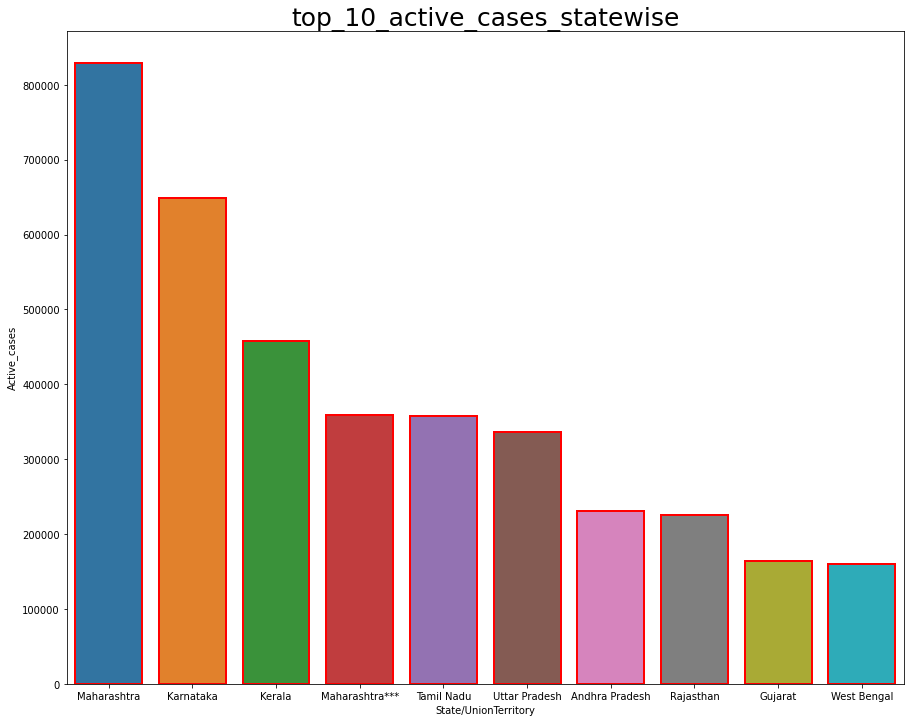

In [27]:
top_10_state_actve_cases = covid_df.groupby(by="State/UnionTerritory").max()[["Active_cases","Date"]].sort_values("Active_cases",ascending=False).reset_index()
fig = plt.figure(figsize=(15,12))
plt.title("top_10_active_cases_statewise",size=25)
ax = sns.barplot(data= top_10_state_actve_cases.iloc[:10],x="State/UnionTerritory", y="Active_cases",linewidth=2 ,edgecolor="red")
plt.shows()

## Find the statewise deaths in india


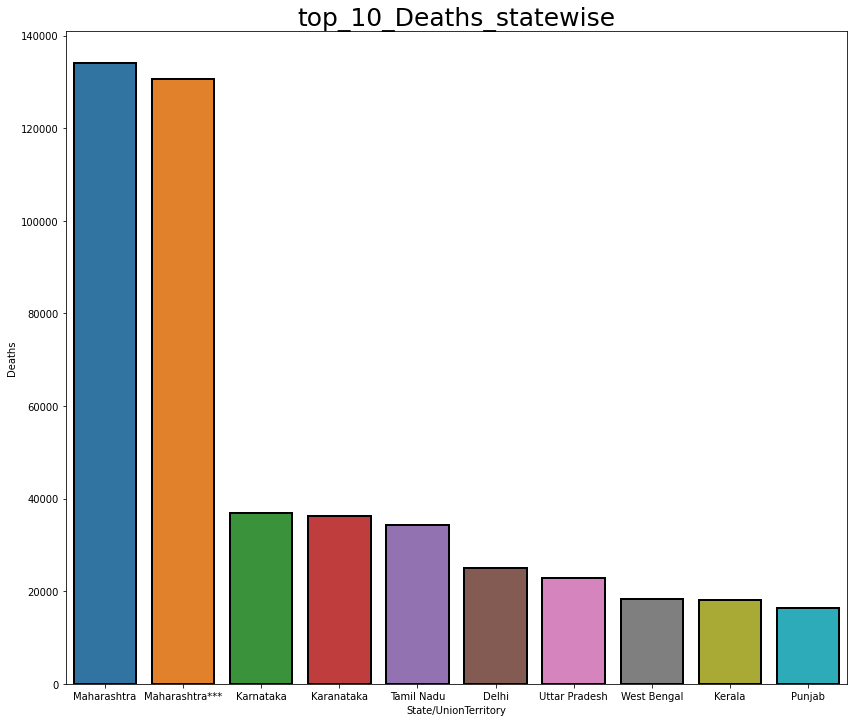

In [33]:
top_10_state_Deaths = covid_df.groupby(by="State/UnionTerritory").max()[["Deaths","Date"]].sort_values("Deaths",ascending=False).reset_index()
fig = plt.figure(figsize=(14,12))
plt.title("top_10_Deaths_statewise",size=25)
ax = sns.barplot(data= top_10_state_actve_cases.iloc[:10],x="State/UnionTerritory", y="Deaths",linewidth=2 ,edgecolor="Black")
plt.show()

In [32]:
covid_df.head(2)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,30-01-2020,6:00 PM,Kerala,0,0,1,1
1,31-01-2020,6:00 PM,Kerala,0,0,1,1


## create the top 5 statewise grap

Text(0.5, 1.0, 'top_5_statewise_grap')

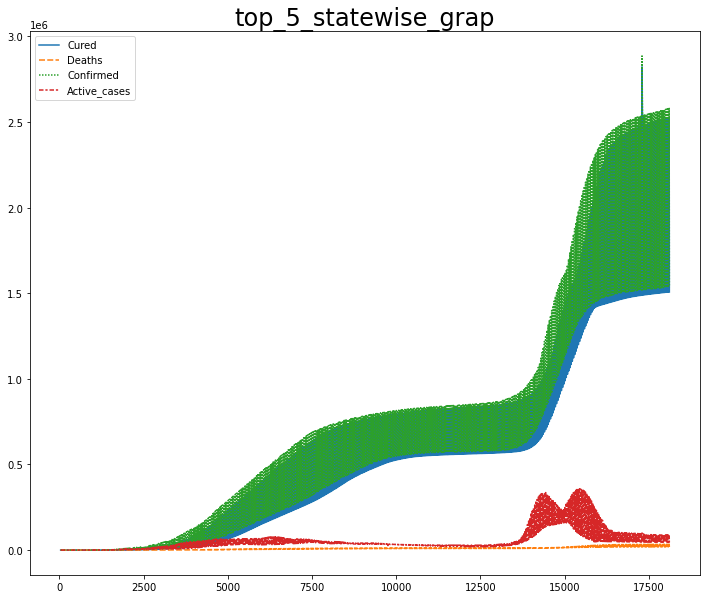

In [34]:
fig = plt.figure(figsize=(12,10))
ax = sns.lineplot(data= covid_df[covid_df["State/UnionTerritory"].isin(["Maharastra","Karanataka","Tamil Nadu","Uttar Pradesh","West Bengal"])])
ax.set_title("top_5_statewise_grap",size=24)

In [85]:
vaccin_df = pd.read_csv("C:\\Users\Dell\\Downloads\\covid_19_in_India\\covid_vaccine_statewise.csv")

In [86]:
vaccin_df.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


## delete unwanted columns

In [89]:
new_vaccin_df = vaccin_df.rename(columns={"Updated On": "Date","Total Individuals Vaccinated": "Total_vaccinated"})

In [90]:
new_vaccin_df

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total_vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## selete particalars columns

In [96]:
vac_df = new_vaccin_df[["Date","State","Male(Individuals Vaccinated)","Female(Individuals Vaccinated)","Total_vaccinated"]]

In [97]:
vac_df

,Date,State,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total_vaccinated
0,16/01/2021,India,23757.0,24517.0,48276.0
1,17/01/2021,India,27348.0,31252.0,58604.0
2,18/01/2021,India,41361.0,58083.0,99449.0
3,19/01/2021,India,81901.0,113613.0,195525.0
4,20/01/2021,India,98111.0,153145.0,251280.0
...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN


## replace when india then MH

In [115]:
vac_df[vac_df["State"]=="India"] ="MH"

,Date,State,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total_vaccinated
0,MH,MH,MH,MH,MH
1,MH,MH,MH,MH,MH
2,MH,MH,MH,MH,MH
3,MH,MH,MH,MH,MH
4,MH,MH,MH,MH,MH
...,...,...,...,...,...
207,MH,MH,MH,MH,MH
208,MH,MH,MH,MH,MH
209,MH,MH,MH,MH,MH
210,MH,MH,MH,MH,MH


In [117]:
vac_df[vac_df["State"]=="MH"]

,Date,State,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total_vaccinated
0,MH,MH,MH,MH,MH
1,MH,MH,MH,MH,MH
2,MH,MH,MH,MH,MH
3,MH,MH,MH,MH,MH
4,MH,MH,MH,MH,MH
...,...,...,...,...,...
207,MH,MH,MH,MH,MH
208,MH,MH,MH,MH,MH
209,MH,MH,MH,MH,MH
210,MH,MH,MH,MH,MH


## Delete index raw 

In [124]:
new_vac_df= vac_df.drop(vac_df.index[:221],axis = 0)

## create groupby total_vaccination

In [197]:
new_vac_df.groupby("State").sum()[["Total_vaccinated"]].sort_values("Total_vaccinated",ascending=False)
##new_vac_df.style.background_gradient (cmap =("cubehelix"))


,Total_vaccinated
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08
Karnataka,8.685235e+08
Madhya Pradesh,7.718640e+08
Bihar,6.608479e+08
Kerala,6.208252e+08


In [148]:
new_vac_df.head(5)

,Date,State,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total_vaccinated
223,27/01/2021,Andaman and Nicobar Islands,NaN,NaN,1519.0
224,28/01/2021,Andaman and Nicobar Islands,NaN,NaN,1956.0
225,29/01/2021,Andaman and Nicobar Islands,NaN,NaN,2024.0
226,30/01/2021,Andaman and Nicobar Islands,NaN,NaN,2060.0
227,31/01/2021,Andaman and Nicobar Islands,NaN,NaN,2060.0


## find the top 5 vaccination state

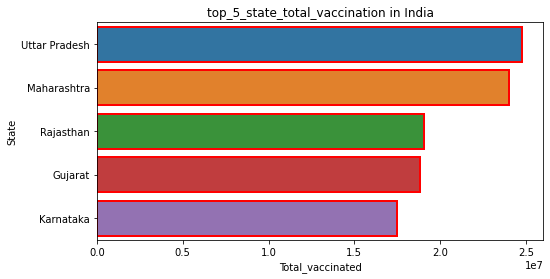

In [169]:
top_5_total_vaccination = new_vac_df.groupby(by="State").max()[["Total_vaccinated","Date"]].sort_values("Total_vaccinated",ascending=False).reset_index()
fig = plt.figure(figsize=(8,4))
plt.title("top_5_state_total_vaccination in India")
ax = sns.barplot(data=top_5_total_vaccination.iloc[:5],x="Total_vaccinated",y="State",linewidth=2,edgecolor="red")
plt.show()

In [170]:
new_vac_df

,Date,State,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total_vaccinated
223,27/01/2021,Andaman and Nicobar Islands,NaN,NaN,1519.0
224,28/01/2021,Andaman and Nicobar Islands,NaN,NaN,1956.0
225,29/01/2021,Andaman and Nicobar Islands,NaN,NaN,2024.0
226,30/01/2021,Andaman and Nicobar Islands,NaN,NaN,2060.0
227,31/01/2021,Andaman and Nicobar Islands,NaN,NaN,2060.0
...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN
